In [47]:
import geopandas as gpd
from pathlib import Path
import fiona

P = Path(r"\\ppeng.com\pzdata\clients\Arvin-Edison WSD-1215\121523003-Frick Unit Pipeline\200 Technical\202 General\KMZs\kmls")
str(P)

'\\\\ppeng.com\\pzdata\\clients\\Arvin-Edison WSD-1215\\121523003-Frick Unit Pipeline\\200 Technical\\202 General\\KMZs\\kmls'

In [44]:
import zipfile
# Open the KMZ file
for file in P.glob("*.kmz"):
    zipdata = zipfile.ZipFile(file)
    zipinfos = zipdata.infolist()

    # iterate through each file
    for zipinfo in zipinfos:
        # zipinfo.filename = str(P.joinpath(f"{file.stem}.kml"))
        zipinfo.filename = f"{file.stem}.kml"
        print(zipinfo.filename)
        zipdata.extract(zipinfo)

Block Reference [9194F].kml
Frick Unit Areas.kml
Frick Unit.kml


'Block Reference 9194F'

'Polylines'

<Axes: >

'Frick Unit Areas'

'Polygons'

<Axes: >

'Frick Unit'

'Points'

<Axes: >

'Polylines'

<Axes: >

'Polygons'

<Axes: >

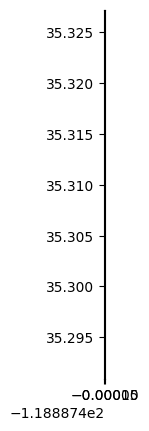

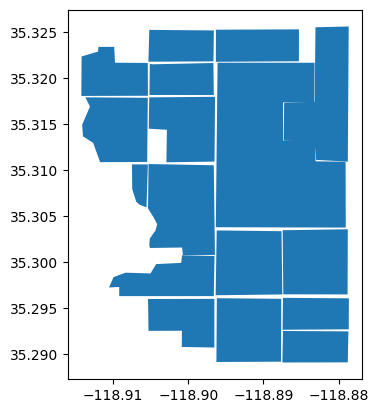

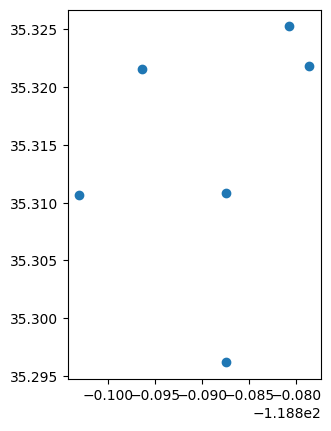

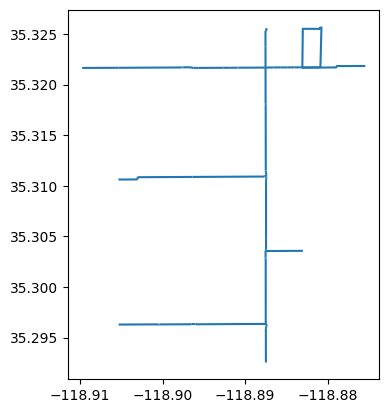

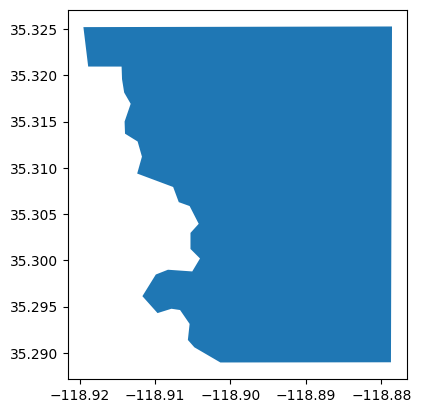

In [50]:
gdbs = {file.stem:{layer:gpd.read_file(file,driver='FileGDB',layer=layer) for layer in fiona.listlayers(file)} for file in P.glob('**/*.gdb')}

from IPython.display import display
for name, gdb in gdbs.items():
	display(name)
	for k,v in gdb.items():
		display(k)
		display(v.plot())


In [19]:
# gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'

# READ KML file to a geopandas dataframe 
file = P.joinpath('doc.kml')
file
# gdf = gpd.read_file(file,driver='KML')
# gdf.head()


WindowsPath('//ppeng.com/pzdata/clients/Arvin-Edison WSD-1215/121523003-Frick Unit Pipeline/200 Technical/202 General/KMZs/kmls/doc.kml')

In [20]:
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'

gdf = gpd.read_file(file, driver="KML")
gdf.head(2)

GEOSException: IllegalArgumentException: point array must contain 0 or >1 elements
